In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [6]:
#No missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
num = df.select_dtypes(include = 'float64')
num

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [6]:
cat = df.select_dtypes('object')
cat

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [7]:
df.clarity.nunique()
df.cut.nunique()
df.color.nunique()

7

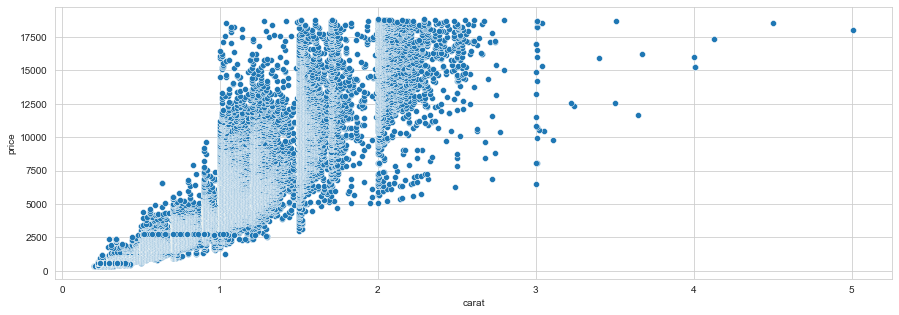

In [8]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df.carat,y=df.price)
plt.show()

- We can observe as the count of carat increases price also increases.
- Most of the carat values are between 1 to 2.

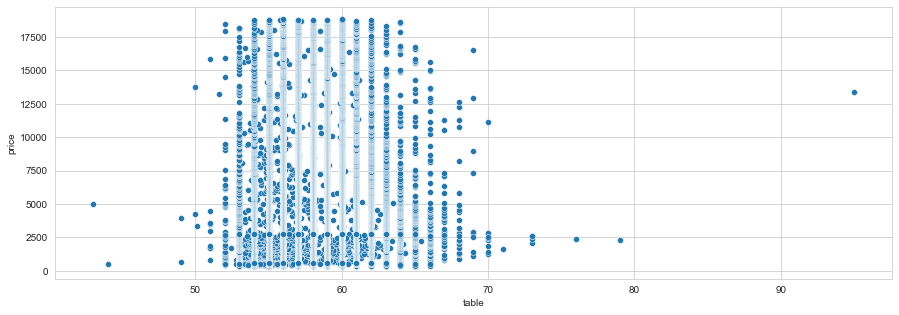

In [9]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df.table,y=df.price)
plt.show()

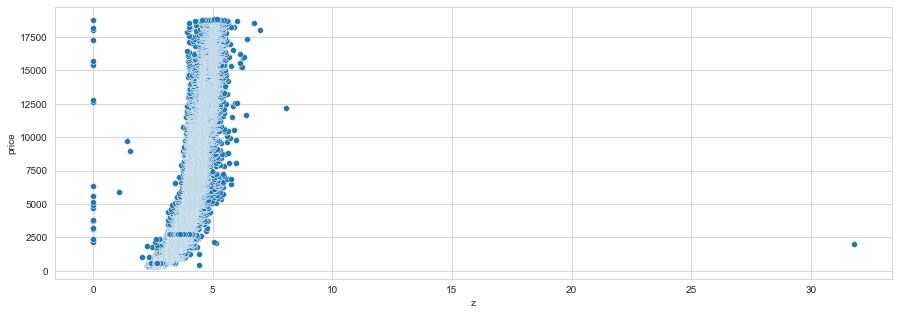

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df.z,y=df.price)
plt.show()

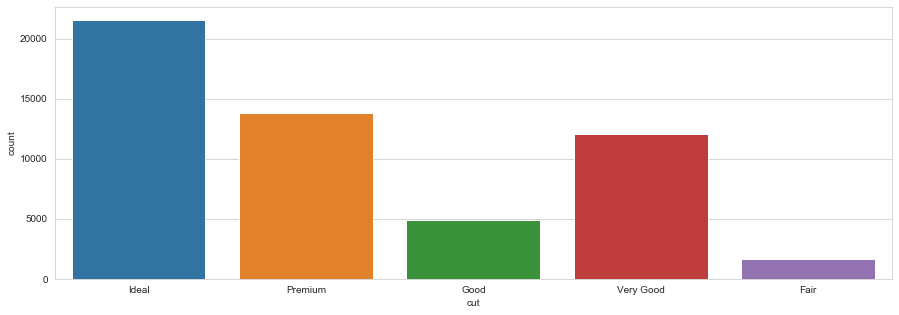

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x=df.cut)
plt.show()

- We can observe the count of ideal is more than the rest.

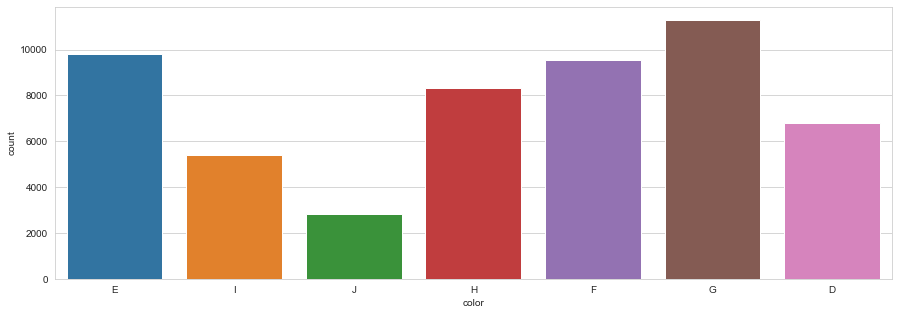

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(x=df.color)
plt.show()

- The count of color G is more followed E,F and so on.

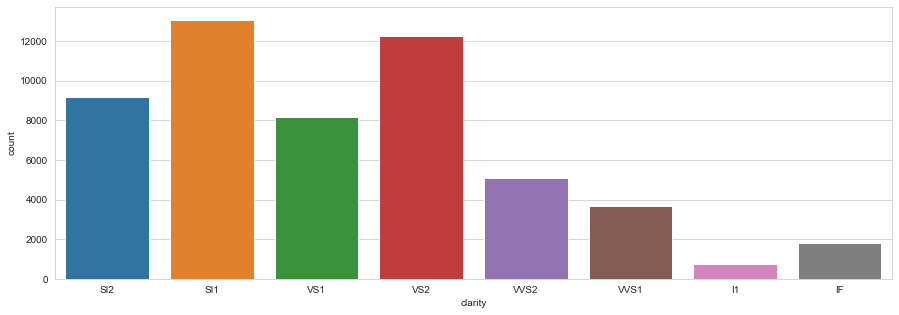

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x=df.clarity)
plt.show()

- The count for s11 is more followed by vs2, s12 and so on

### Multivariate Analysis

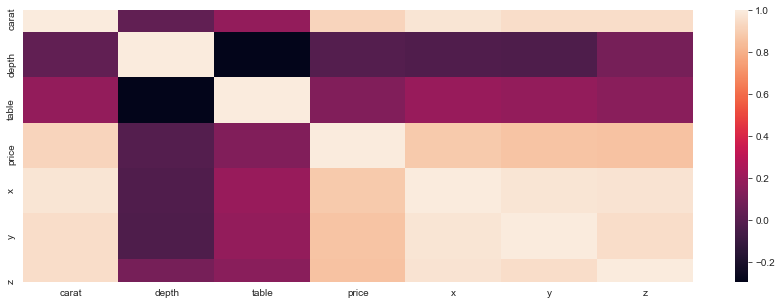

In [14]:
corr = df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr)

- We can observe there are many correlated variables

### Normalization

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(num)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_val_norm = norm.transform(X_val)

In [54]:
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df[['cut','color','clarity']].apply(LabelEncoder().fit_transform)

In [55]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
df = pd.get_dummies(df)

In [16]:
# Seperate IVs and DVs
X = df.drop('price',axis = 1)
y = df['price']

In [17]:
X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [18]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split 
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Regressor

In [21]:
pipeline_LR = Pipeline([('scalar1',StandardScaler()),
                        ('pca1',PCA()),
                        ('LR',LinearRegression())])

In [22]:
pipeline_DT = Pipeline([('scalar2',StandardScaler()),
                        ('pca2',PCA()),
                        ('DT_Regressor',DecisionTreeRegressor())])

In [23]:
pipeline_RF = Pipeline([('scalar3',StandardScaler()),
                        ('pca3',PCA()),
                        ('RF_Regressor',RandomForestRegressor())])

In [24]:
pipeline_KNN = Pipeline([('scalar4',StandardScaler()),
                         ('pca4',PCA()),
                         ('KNN_Regressor',KNeighborsRegressor())])

In [25]:
pipeline_SVM = Pipeline([('scalar5',StandardScaler()),
                        ('pca5',PCA()),
                        ('SVM',SVR())])

In [26]:
pipeline_GB = Pipeline([('scalar6',StandardScaler()),
                        ('pca6',PCA()),
                        ('GB',GradientBoostingRegressor())])

In [27]:
## Lets make the list of pipelines
pipelines = [pipeline_LR,pipeline_DT, pipeline_RF,pipeline_KNN,pipeline_SVM,pipeline_GB]

In [28]:
best_accuracy=0.0
best_regressor=0
best_pipeline=""

In [49]:
# Dictionary of pipelines and Regressor types for ease of reference
pipe_dict = {0: 'LinearRegression', 1: 'DecisionTree', 2: 'RandomForest', 3: 'KNN',4:'SVM', 5: 'GradientBoosting'}

import time
start_time = time.time()
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

end_time = time.time()
duration = end_time - start_time
duration

242.113126039505

In [ ]:
# Dictionary of pipelines and Regressor types for ease of reference
pipe_dict = {0: 'LinearRegression', 1: 'DecisionTree', 2: 'RandomForest', 3: 'KNN',4:'SVM', 5: 'GradientBoosting'}

import time
start_time = time.time()
# Fit the pipelines
y_pred
for pipe in pipelines:
    pipe.predict(X_train)

end_time = time.time()
duration = end_time - start_time
duration

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import root_mean_square_error
from sklearn.metrics import r2_score

In [ ]:
import sklearn.metrics as sm

for i,model in enumerate(pipelines):
    print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
    print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
    print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
    print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

In [45]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

LinearRegression Test Accuracy: 0.9189396499888929
DecisionTree Test Accuracy: 0.9482396559188601
RandomForest Test Accuracy: 0.971213632154861
KNN Test Accuracy: 0.9574898207774571
SVM Test Accuracy: 0.3541419648918992
GradientBoosting Test Accuracy: 0.9616029073625153


In [113]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_regressor=i
print('Regressor with best accuracy:{}'.format(pipe_dict[best_regressor]))

Regressor with best accuracy:LinearRegression


In [112]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_Regressor=i
print('Regressor with best accuracy:{}'.format(pipe_dict[best_regressor]))

Regressor with best accuracy:LinearRegression


## Pipelines- Performing Hyperparameter Tuning using Grid Search CV 

In [114]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)